# Loan Default Prediction

## 1. Examine the Data
### Load the Dataset
First, we need to load the dataset into a Pandas DataFrame. The dataset is in CSV format and we can use pandas.read_csv().

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

# Display the first 5 rows
print(df.head())


         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_

### Review the Dataset Structure
After loading the dataset, we inspect its structure to understand the features (columns) and their data types.

In [2]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# List all columns (features)
print("Columns in the dataset:", df.columns)

# Check data types of each column
print("Data types:\n", df.dtypes)

# # Get dataset information (column names, non-null counts, data types)
print("Dataset Info:\n")
df.info()

Shape of the dataset: (2260701, 151)
Columns in the dataset: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)
Data types:
 id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entri

### Summarize the Data
Use Pandas and NumPy to summarize the dataset, including distributions, missing values, and outliers.

#### a. Summarize Numerical Features
For numerical features (e.g., loan amount, interest rate), we calculate descriptive statistics.

In [3]:
# Summary statistics for numerical columns
print("Summary statistics:\n", df.describe())

# Check for missing values in numerical columns
print("Missing values in numerical columns:\n", df.isnull().sum())

Summary statistics:
        member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  1.1

#### b. Summarize Categorical Features
For categorical features (e.g., loan status, borrower occupation), we check unique values and their frequencies.

In [4]:
# Summary of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].value_counts())
    print("\n")

Unique values in id:
 id
Total amount funded in policy code 2: 521953170    1
68407277                                           1
68355089                                           1
68341763                                           1
66310712                                           1
                                                  ..
68577849                                           1
68466916                                           1
68354783                                           1
68466961                                           1
66624733                                           1
Name: count, Length: 2260701, dtype: int64


Unique values in term:
 term
36 months    1609754
60 months     650914
Name: count, dtype: int64


Unique values in grade:
 grade
B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: count, dtype: int64


Unique values in sub_grade:
 sub_grade
C1    145903
B5    140288
B4    139793
B3    131514
C2    131116
C

### Check for Missing Values
Identify and handle missing values in the dataset and visualize them to understand its distribution.

Missing values per column:
 id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64
Percentage of missing values:
 id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64


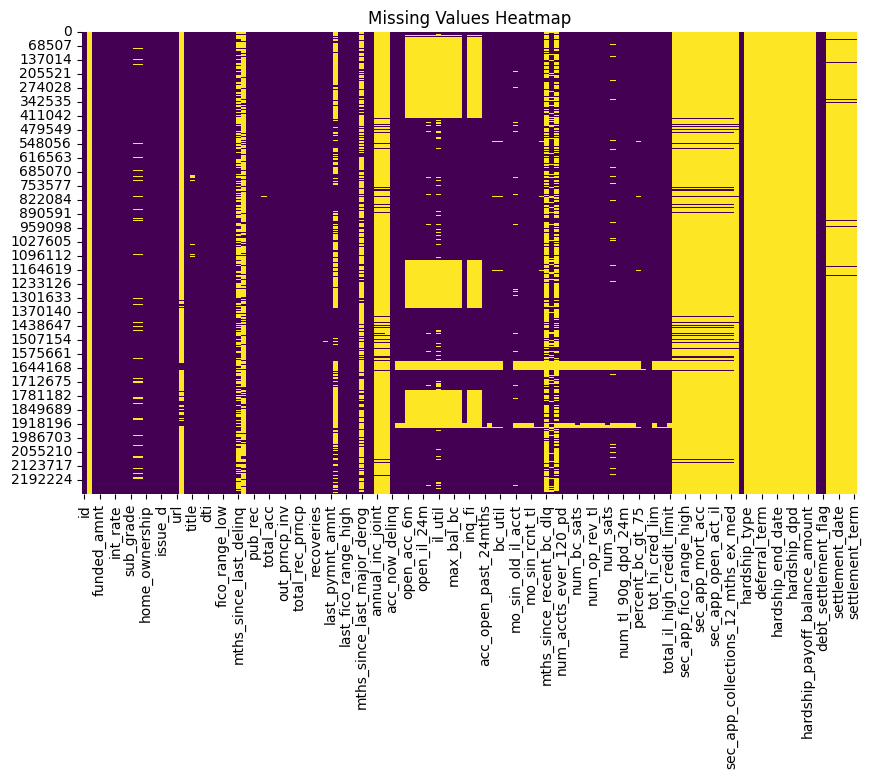

In [5]:
# Total missing values per column
print("Missing values per column:\n", df.isnull().sum())

# Percentage of missing values
print("Percentage of missing values:\n", df.isnull().mean() * 100)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Detect Outliers
Use boxplots and statistical methods (e.g., IQR) to detect outliers in critical features like loan amount and interest rate.

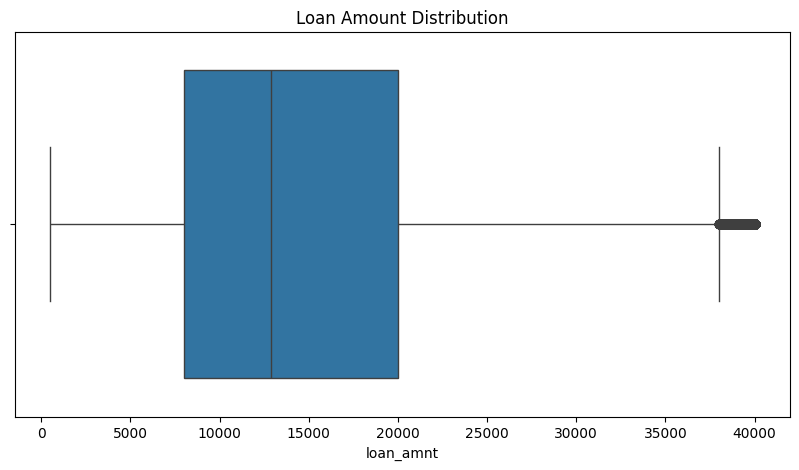

Outliers in loan amount:
                 id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
421139   130951046        NaN    40000.0      40000.0          40000.0   
421301   130838418        NaN    40000.0      40000.0          40000.0   
421354   130872223        NaN    40000.0      40000.0          40000.0   
421380   130499195        NaN    40000.0      40000.0          40000.0   
421392   130920393        NaN    40000.0      40000.0          40000.0   
...            ...        ...        ...          ...              ...   
2260600   90104160        NaN    40000.0      40000.0          40000.0   
2260665   89937139        NaN    40000.0      40000.0          39925.0   
2260680   89024450        NaN    40000.0      40000.0          39975.0   
2260689   88979824        NaN    40000.0      40000.0          40000.0   
2260696   88985880        NaN    40000.0      40000.0          40000.0   

               term  int_rate  installment grade sub_grade  ...  \
421139    60 month

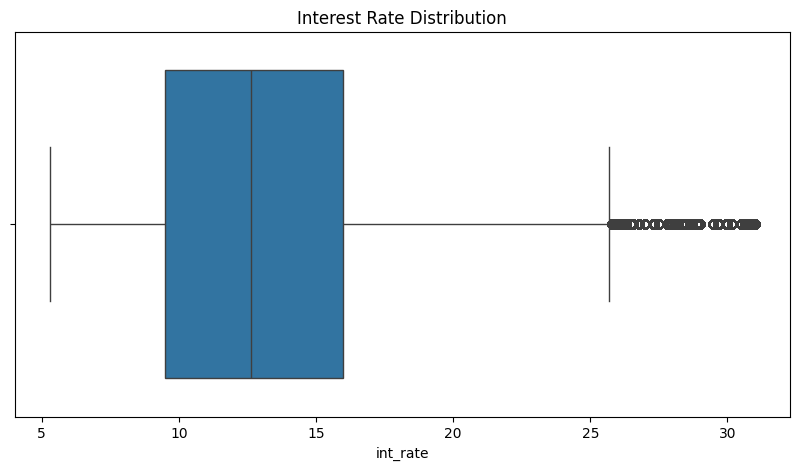

In [6]:
# Boxplot for loan amount to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['loan_amnt'])
plt.title("Loan Amount Distribution")
plt.show()

# Calculate IQR for loan amount
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['loan_amnt'] < (Q1 - 1.5 * IQR)) | (df['loan_amnt'] > (Q3 + 1.5 * IQR))]
print("Outliers in loan amount:\n", outliers)

# Boxplot for Interest Rate
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["int_rate"])
plt.title("Interest Rate Distribution")
plt.show()


### Visualize Distributions
Visualize the distributions of key features to better understand the data.

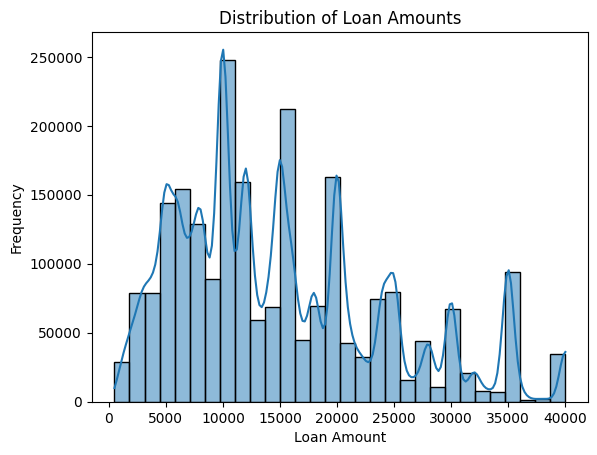

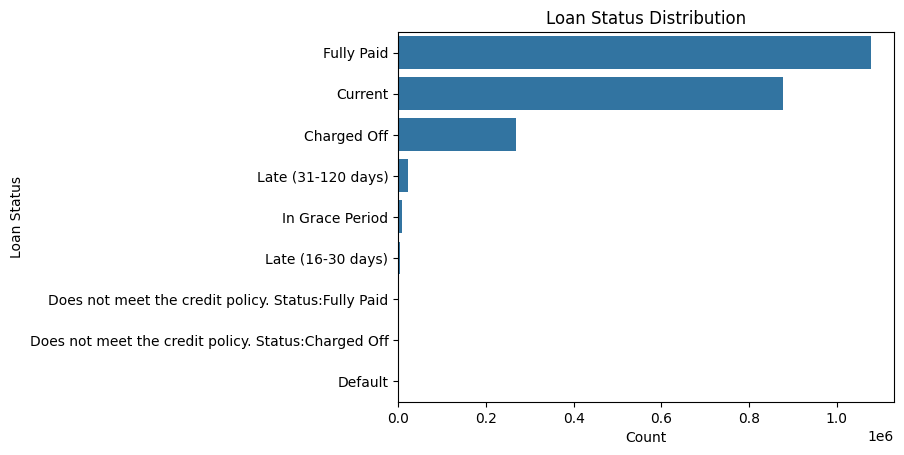

In [7]:
# Histogram of loan amounts
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Bar plot of loan status
sns.countplot(y='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title("Loan Status Distribution")
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.show()

## Data Cleaning
### Handling Missing Data
We handle the missing data based on the feature type:
- High missing percentage (>50%): Drop column
- Categorical:	Fill with most frequent value (mode())
- Numerical: Fill with median or mean
- Date-related:	Compute time difference

In [9]:
# Display columns that have more than 50% missing values
missing_percent = df.isnull().sum() / len(df) * 100
high_missing_cols = missing_percent[missing_percent > 50]
print(high_missing_cols)

# Drop columns with >50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values in categorical columns with the mode
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

member_id                                     100.000000
desc                                           94.423632
mths_since_last_delinq                         51.246715
mths_since_last_record                         84.113069
next_pymnt_d                                   59.509993
mths_since_last_major_derog                    74.309960
annual_inc_joint                               94.660506
dti_joint                                      94.660683
verification_status_joint                      94.880791
mths_since_recent_bc_dlq                       77.011511
mths_since_recent_revol_delinq                 67.250910
revol_bal_joint                                95.221836
sec_app_fico_range_low                         95.221792
sec_app_fico_range_high                        95.221792
sec_app_earliest_cr_line                       95.221792
sec_app_inq_last_6mths                         95.221792
sec_app_mort_acc                               95.221792
sec_app_open_acc               

### Handling Outliers
Cap outliers to a certain threshold. We have two options, capping based on Interquartile Range and capping based on Percentile. Since the histogram of loan amounts shows that it is probably skewed, the Percentile-based is more appropriate.

In [11]:
# Cap outliers in loan amount to the 95th percentile
df['loan_amnt'] = df['loan_amnt'].clip(upper=df['loan_amnt'].quantile(0.95))

For annual income amounts, the data distribution is heavily skewed to the right. So we use Log Transformation to handle the outliers.

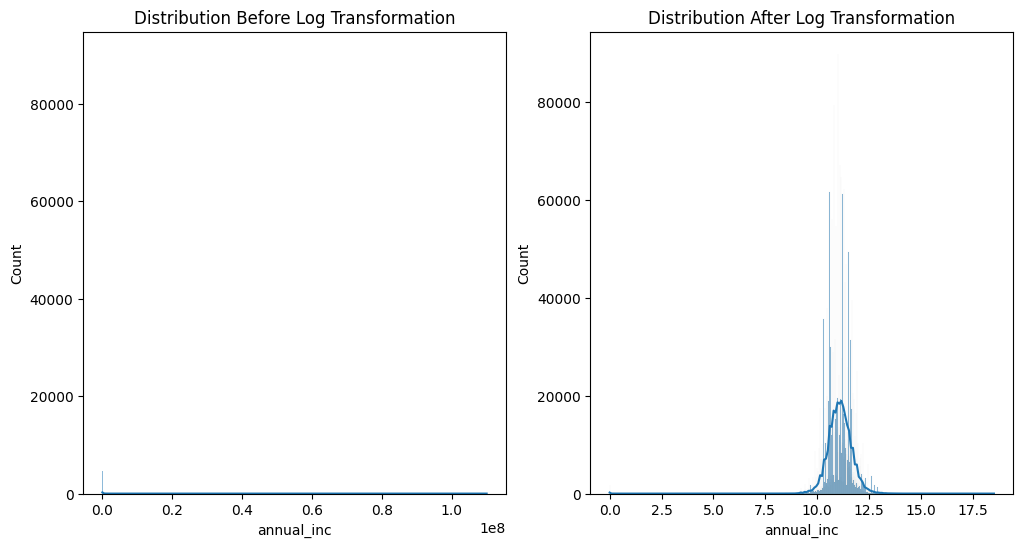

In [12]:
# Distribution before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['annual_inc'], kde=True)
plt.title('Distribution Before Log Transformation')

# Distribution after transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['annual_inc']), kde=True)
plt.title('Distribution After Log Transformation')

plt.show()

# Log transformation for annual income
df['annual_inc'] = np.log1p(df['annual_inc'])